#INSTALLING DEPENDENCIES


In [ ]:
!pip install "unstructured[all-docs]"

In [ ]:
!pip install pillow
!pip install lxml
!pip install chromadb tiktoken
!pip install langchain langchain-community langchain-openai langchain-groq
!pip install poppler

ERROR: Could not find a version that satisfies the requirement poppler (from versions: none)
ERROR: No matching distribution found for poppler


In [ ]:
!apt-get install poppler-utils tesseract-ocr libmagic-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
poppler-utils is already the newest version (22.02.0-2ubuntu0.10).
The following NEW packages will be installed:
  libmagic-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 105 kB of archives.
After this operation, 389 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Fetched 105 kB in 1s (150 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 126465 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Setting up libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Processing triggers for man-db (2.10.2-1) ...


#EXTRACTING THE DATA

In [ ]:
from unstructured.partition.pdf import partition_pdf

output_path = "/content/Output Path"
file_path = "/content/W2D1.pdf"

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",

    extract_image_block_types=["Image"],
    extract_image_block_to_payload=True,

    chunking_strategy="by_title",
    max_characters = 10000,
    combine_text_under_n_chars = 2000,
    new_after_n_chars = 6000,
    )


In [ ]:
elements = chunks[6].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '5a5961dc-59ba-4fef-92d7-653f73e61523',
 'text': 'Values (centimeters) sepal length sepalwidth petallength —_ petal width',
 'metadata': {'coordinates': {'points': ((np.float64(216.66666666666666),
     np.float64(366.66666666666663)),
    (np.float64(216.66666666666666), np.float64(1416.6666666666665)),
    (np.float64(1583.3333333333333), np.float64(1416.6666666666665)),
    (np.float64(1583.3333333333333), np.float64(366.66666666666663))),
   'system': 'PixelSpace',
   'layout_width': 2000,
   'layout_height': 1500},
  'last_modified': '2025-09-17T05:11:51',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 47,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAQaBVYDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAA

#SEPERATING EXTRACTED ELEMENTS INTO TABLES, TEXT AND IMAGES

In [ ]:
tables=[]
texts=[]

for chunk in chunks:
  if "Table" in str(type(chunk)):
    tables.append(chunk)
  elif "CompositeElement" in str(type(chunk)):
    texts.append(chunk)

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABiARIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooqrd3sdshLEUAWHkVBkkVnXetW9sCWdRj3ri9d8YNvaG0+d+hPZa4+4kvL599xKz85weg/CumjhZ1NdkZTrRjpuz0G68d2UbFVlD/AO4M/qKypfiAC3yRS498f41xy26nuW+nNPFtx/qpPyFaShgqbtUqa+qFFY

In [ ]:
def get_images_base64(chunks):
  images_b64 = []
  for chunk in chunks:
    if "CompositeElement" in str(type(chunk)):
      chunk_els = chunk.metadata.orig_elements
      for el in chunk_els:
        if 'Image' in str(type(el)):
          images_b64.append(el.metadata.image_base64)
  return images_b64

images = get_images_base64(chunks)

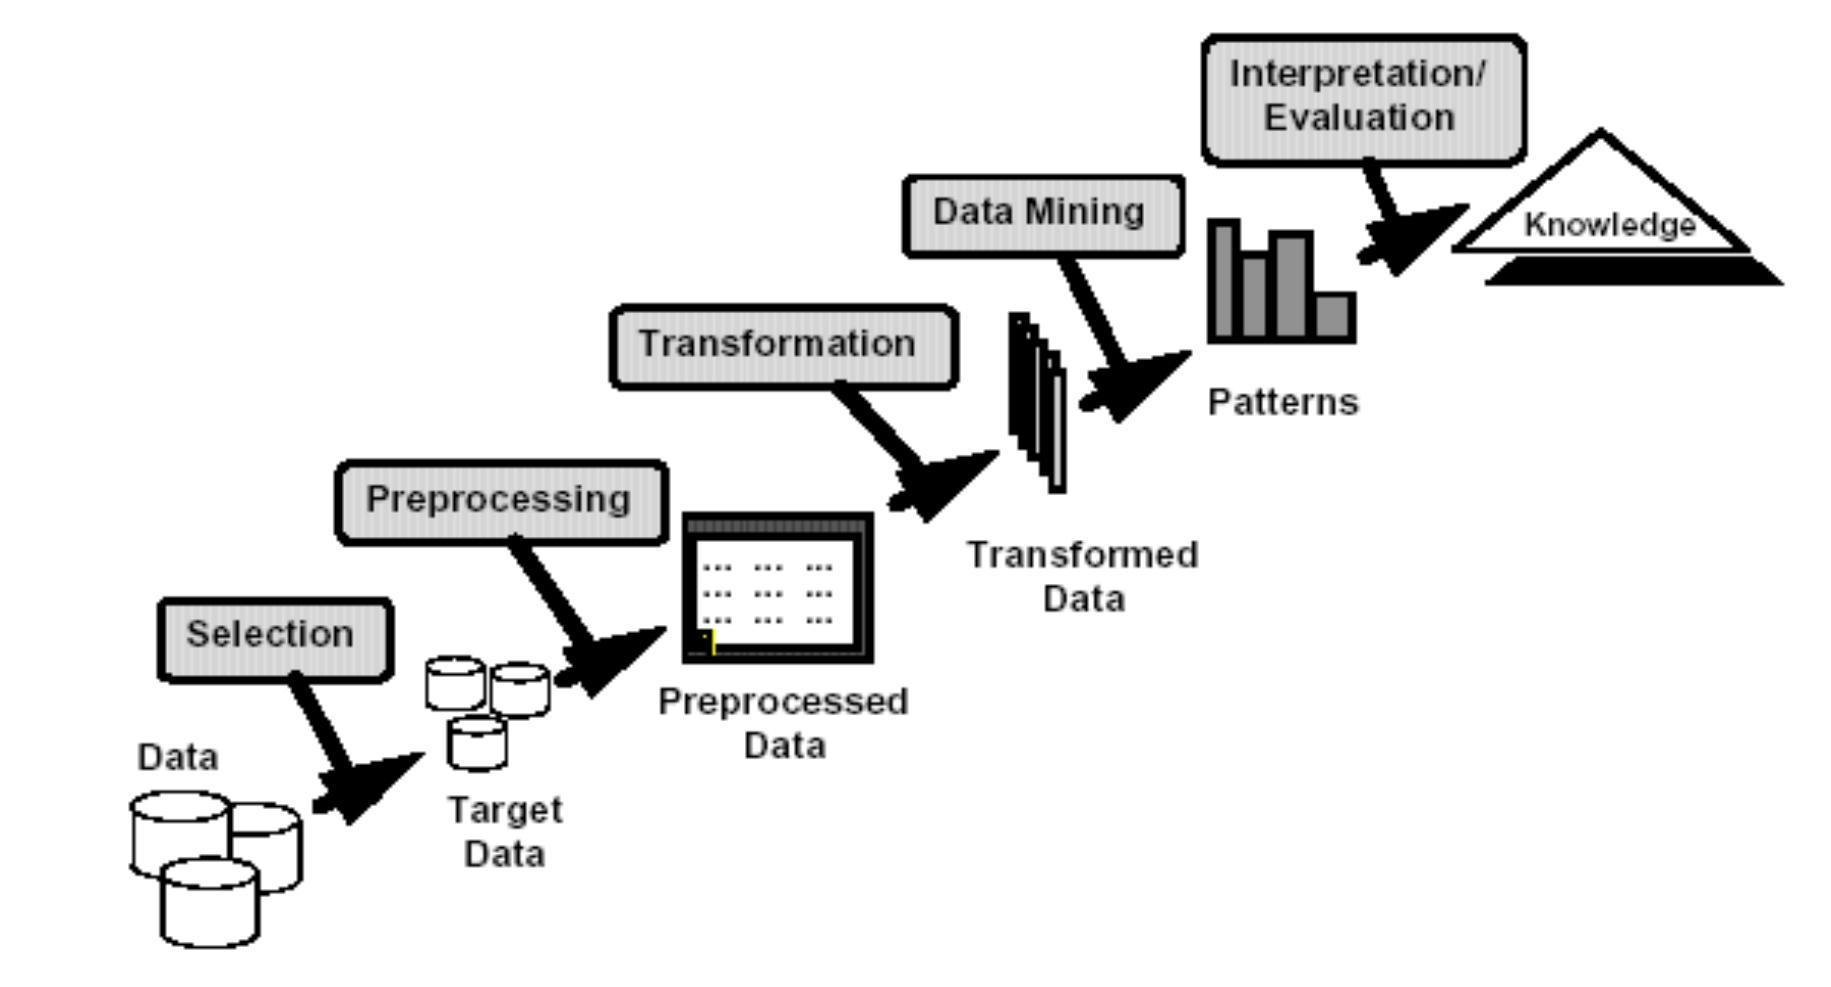

In [ ]:
import base64
from IPython.display import Image, display

def display_base64_images(base64_code):
  image_data = base64.b64decode(base64_code)
  display(Image(data=image_data))

display_base64_images(images[2])

#SUMMARIZING THE DATA

In [ ]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [ ]:
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}
"""

from google.colab import userdata
groq_api_key = userdata.get('GROQ_API_KEY')

prompt = ChatPromptTemplate.from_template(prompt_text)
model = ChatGroq(temperature = 0.5, model="llama-3.1-8b-instant", api_key=groq_api_key)
summarize_chain = prompt | model | StrOutputParser()

In [ ]:
raw_texts = [el.text for el in texts if hasattr(el, "text")]

In [ ]:
import tiktoken

enc = tiktoken.get_encoding("cl100k_base")  # works fine as an approximation

def count_tokens(text: str) -> int:
    return len(enc.encode(text))

token_limit =
current_tokens = 0
selected_texts = []

for txt in raw_texts:
    txt_tokens = count_tokens(txt)
    # stop if adding this one would exceed Groq’s limit
    if current_tokens + txt_tokens > token_limit:
        break
    selected_texts.append(txt)
    current_tokens += txt_tokens


text_summaries = summarize_chain.batch(selected_texts,{"max_concurrency": 3})

In [ ]:
text_summaries

["The Department of Computer Science at North Carolina State University's College of Engineering is teaching a lecture on Data Mining, highlighting the importance of data preprocessing, transformation, and interpretation. The lecture discusses data biases and their impact on results, using real-world examples such as a pregnancy study and a stock market trading strategy that relies on Carmichael numbers.",
 "The table presents the results of a backtest of an investment strategy in People's Energy Corp from 1926 to 2005, showing returns, standard deviation, and various risk metrics."]

In [ ]:
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html,{"max_concurrency": 3})

In [ ]:
table_summaries

[]

In [ ]:
from langchain_openai import ChatOpenAI
from google.colab import userdata

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)
openai_api_key = userdata.get('OPENAI_API_KEY')
chain = prompt | ChatOpenAI(model="gpt-4o-mini", api_key=openai_api_key) | StrOutputParser()

image_summaries=[]
image_summaries.append(chain.invoke(images[2]))

In [ ]:
image_summaries

['The image illustrates a conceptual flowchart outlining the stages involved in transforming raw data into knowledge, typically associated with data processing and analysis workflows. \n\n1. **Flow Direction**: The flow is represented by arrows that connect various stages, indicating a linear progression from one phase to the next.\n\n2. **Stages**:\n   - **Selection**: At the beginning of the flow, there are two symbols representing data sources, implying the initial step of selecting relevant data for analysis.\n   - **Preprocessing**: This stage processes the selected data to prepare it for analysis. A highlighted box labeled "Preprocessed Data" indicates that this is a significant step where data is organized and cleaned.\n   - **Transformation**: Following preprocessing, data undergoes transformation to convert it into a suitable format or structure, essential for the next phase.\n   - **Data Mining**: Here, the transformed data is subjected to analysis techniques to extract usefu

#LOAD AND SUMMARIZE TO VECTOR DATABASE

In [ ]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

openai_api_key = userdata.get('OPENAI_API_KEY')

vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings(openai_api_key=openai_api_key))

store = InMemoryStore()
id_key = "doc_id"

retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

/tmp/ipython-input-1405573782.py:10: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings(openai_api_key=openai_api_key))


In [ ]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# # Add tables
# table_ids = [str(uuid.uuid4()) for _ in tables]
# summary_tables = [
#     Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
# ]
# retriever.vectorstore.add_documents(summary_tables)
# retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

In [ ]:
chunks = retriever.invoke(
    "What are steps involved in trnasformations"
)

chunks

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGYBxUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigA

In [ ]:
# import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image



for i,chunk in enumerate(chunks):
  if "CompositeElement" in str(type(chunk)):
    print("\n\nChunk",i)
    for doc in chunk.metadata.orig_elements:
      print(doc.to_dict()["type"],doc.metadata.page_number)




Chunk 1
Image 1
Title 1
Title 1
NarrativeText 1
Title 1
Title 1
Header 1
Title 2
Image 2
Title 3
Title 4
UncategorizedText 4
UncategorizedText 4
NarrativeText 4
NarrativeText 4
UncategorizedText 4
UncategorizedText 4
UncategorizedText 4
Title 5
Image 5
Title 6
UncategorizedText 6
UncategorizedText 6
Title 6
UncategorizedText 6
Title 6
Title 6
NarrativeText 6
Title 7
Title 7
UncategorizedText 7
UncategorizedText 7
UncategorizedText 7
Title 7
Title 7
Title 8
Image 8
NarrativeText 8
Image 8
UncategorizedText 8
Image 8


Chunk 2
Image 1
Title 1
Title 1
NarrativeText 1
Title 1
Title 1
Header 1
Title 2
Image 2
Title 3
Title 4
UncategorizedText 4
UncategorizedText 4
NarrativeText 4
NarrativeText 4
UncategorizedText 4
UncategorizedText 4
UncategorizedText 4
Title 5
Image 5
Title 6
UncategorizedText 6
UncategorizedText 6
Title 6
UncategorizedText 6
Title 6
Title 6
NarrativeText 6
Title 7
Title 7
UncategorizedText 7
UncategorizedText 7
UncategorizedText 7
Title 7
Title 7
Title 8
Image 8
Narrat

In [ ]:
chunks[3].metadata.orig_elements[0].to_dict()

{'type': 'Image',
 'element_id': 'bac2bd01-4674-477d-94fa-0500e568044c',
 'text': '1 NORTH CAROLINA STATE UNIVERSITY : Department of Computer Science College of Engineering',
 'metadata': {'coordinates': {'points': ((np.float64(33.33333333333333),
     np.float64(0.0)),
    (np.float64(33.33333333333333), np.float64(407.9861111111111)),
    (np.float64(1846.180833333333), np.float64(407.9861111111111)),
    (np.float64(1846.180833333333), np.float64(0.0))),
   'system': 'PixelSpace',
   'layout_width': 2000,
   'layout_height': 1500},
  'last_modified': '2025-09-17T05:11:51',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGYBxUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxF

In [ ]:
!pip install pymupdf

import fitz  # PyMuPDF (install with: pip install pymupdf)
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np # Import numpy

def render_pages(pdf_path, docs, page_number, show_metadata=True):
    """
    Render a given PDF page and overlay extracted elements.

    Args:
        pdf_path (str): Path to the source PDF file.
        docs (list[Document]): Extracted elements with metadata.
        page_number (int): Page number to render (1-based).
        show_metadata (bool): Whether to display metadata labels.
    """
    # Open PDF and load page
    doc = fitz.open(pdf_path)
    page = doc[page_number - 1]  # 0-based index
    pix = page.get_pixmap(matrix=fitz.Matrix(2, 2))  # higher res with scale=2

    # Display with matplotlib
    plt.figure(figsize=(10, 12))
    # Convert pixmap to numpy array for imshow
    img_array = np.frombuffer(pix.samples, dtype=np.uint8).reshape((pix.height, pix.width, pix.n))
    plt.imshow(img_array, aspect="equal")
    plt.axis("off")
    plt.title(f"Page {page_number}", fontsize=16)

    # Overlay extracted elements
    page_docs = [d for d in docs if d.metadata.get("page_number") == page_number]

    for element in page_docs:
        rect = element.metadata.get("bbox")  # bounding box if available
        category = element.metadata.get("category", "Text")

        if rect:
            x0, y0, x1, y1 = rect
            plt.gca().add_patch(
                plt.Rectangle((x0, y0), x1 - x0, y1 - y0,
                              fill=False, edgecolor="red", linewidth=2)
            )
            if show_metadata:
                plt.text(x0, y0 - 5, category,
                         fontsize=8, color="red",
                         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

    plt.show()
    doc.close()

In [ ]:
def extract_page_numbers_from_chunk(chunk):
  elements = chunk.metadata.orig_elements
  page_numbers = set()
  for element in elements:
    page_numbers.add(element.metadata.page_number)
  return page_numbers


def display_chunk_pages(chunk):
  page_numbers = extract_page_numbers_from_chunk(chunk)

  docs=[]
  for element in chunk.metadata.orig_elements:
    metadata = element.metadata.to_dict()
    if "Table" in str[type(element)]:
      metadata["category"] = "Table"
    elif "Image" in str[type(element)]:
      metadata["category"] = "Image"
    else:
      metadata["category"] = "Text"
    metadata["page_number"] = int(element.metadata.page_number)

    docs.append(Document(page_content=element.text, metadata=metadata))

  for page_num in page_numbers:
    render_pages(docs, page_number, False)

In [ ]:
def extract_page_numbers_from_chunk(chunk):
  elements = chunk.metadata.orig_elements
  page_numbers = set()
  for element in elements:
    page_numbers.add(element.metadata.page_number)
  return page_numbers


def display_chunk_pages(chunk):
  page_numbers = extract_page_numbers_from_chunk(chunk)

  docs=[]
  for element in chunk.metadata.orig_elements:
    metadata = element.metadata.to_dict()
    if "Table" in str(type(element)):
      metadata["category"] = "Table"
    elif "Image" in str(type(element)):
      metadata["category"] = "Image"
    else:
      metadata["category"] = "Text"
    metadata["page_number"] = int(element.metadata.page_number)

    docs.append(Document(page_content=element.text, metadata=metadata))

  for page_num in page_numbers:
    render_pages(file_path, docs, page_num, False)

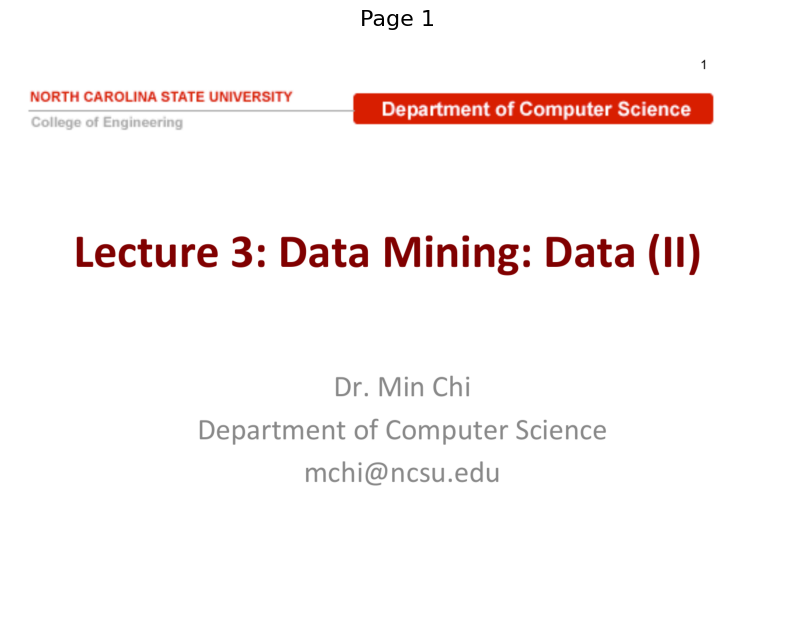

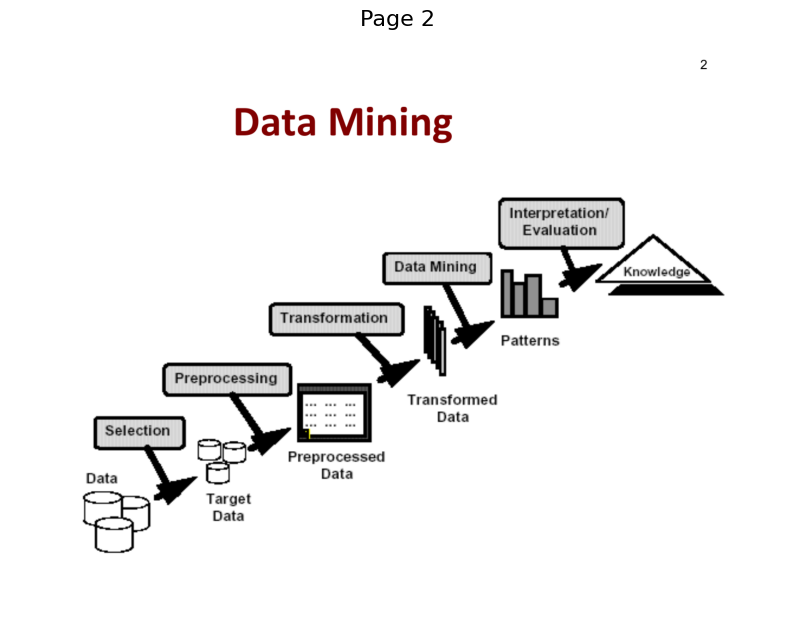

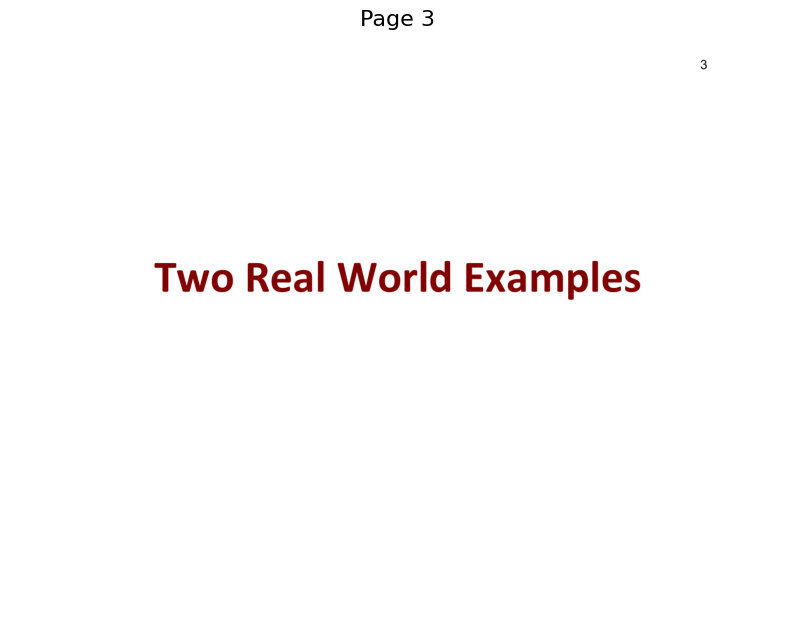

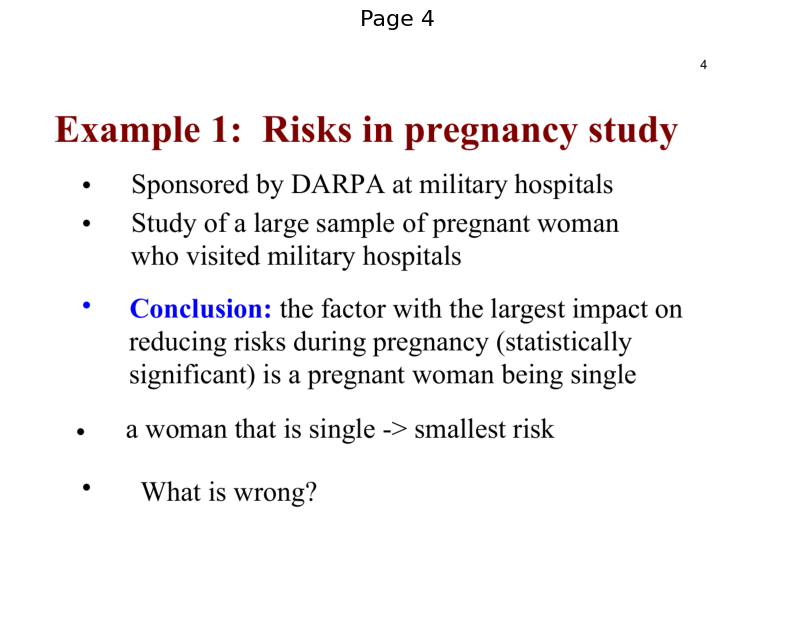

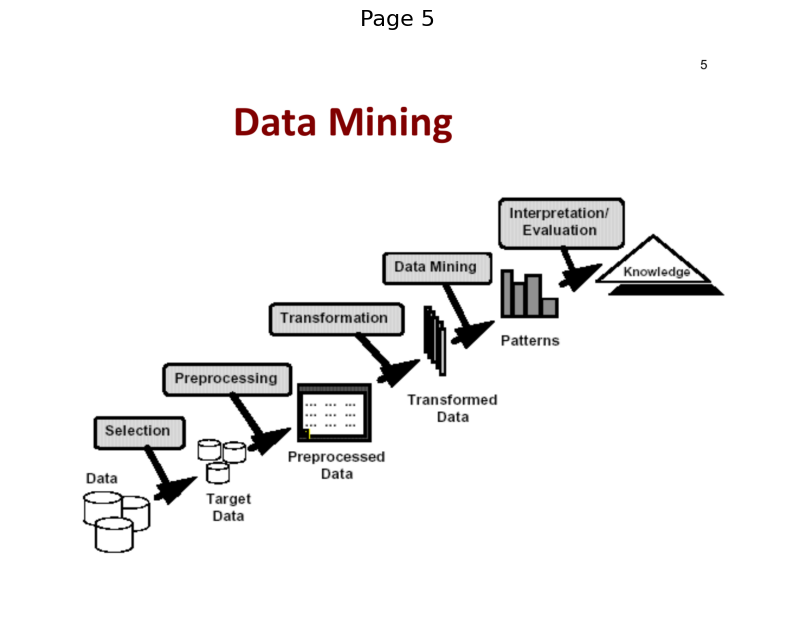

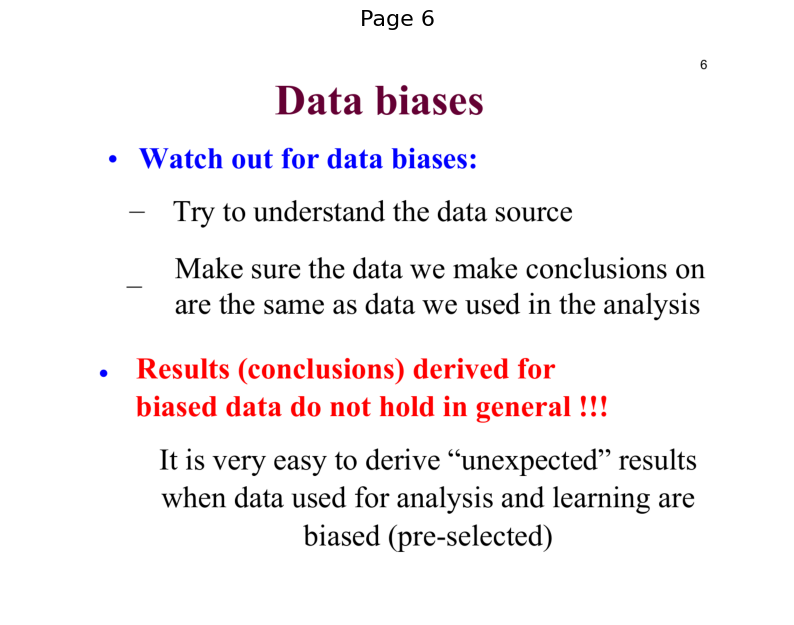

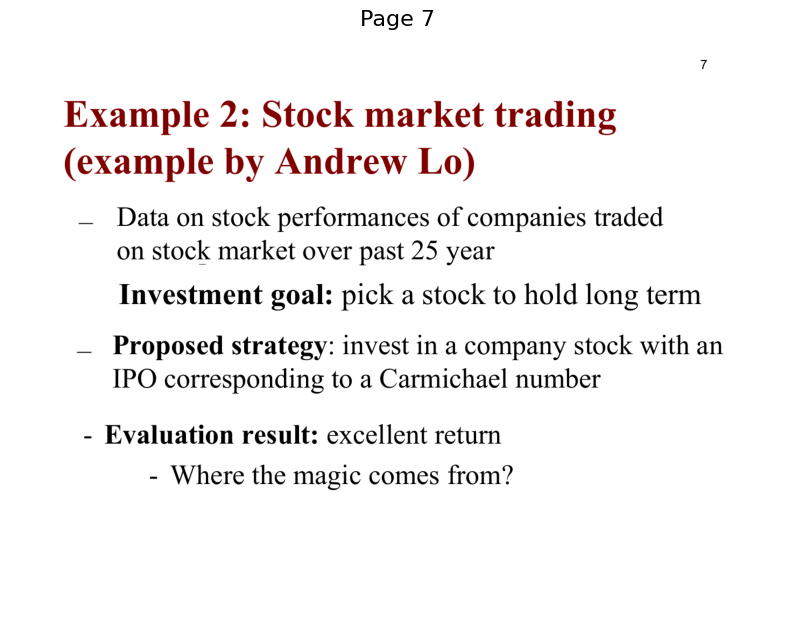

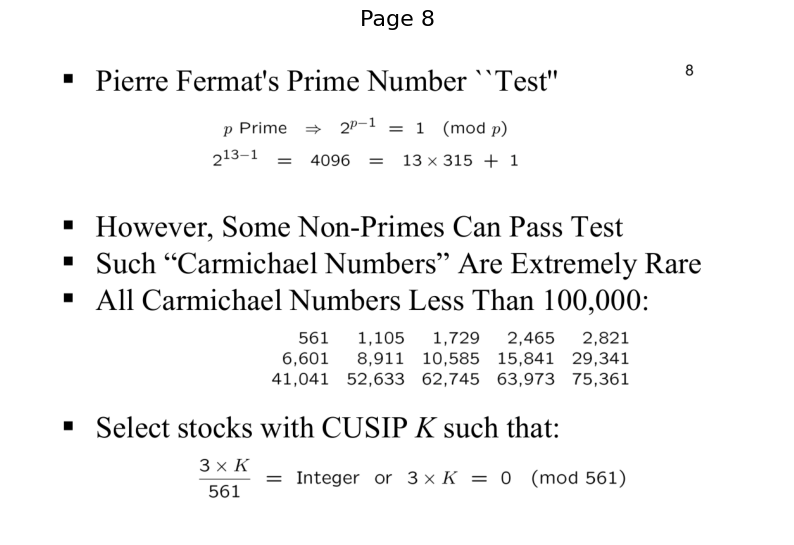

In [ ]:
display_chunk_pages(chunks[2])

#RAG PIPELINE

In [ ]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini",  api_key = openai_api_key)
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini", api_key = openai_api_key)
        | StrOutputParser()
    )
)

In [ ]:
response = chain.invoke("What are the steps involved in transformation")

In [ ]:
response_with_source = chain_with_sources.invoke("What are the steps involved in transformation")

In [ ]:
response_with_source


{'context': {'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGYBxUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKK

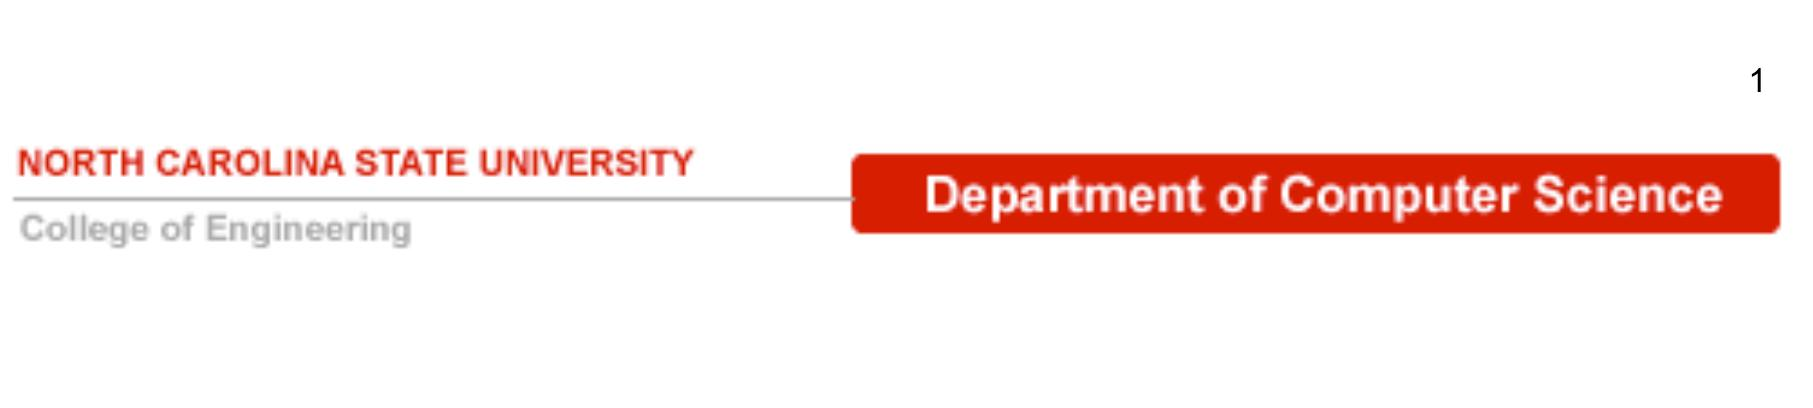

IMAGE SJDNGSDNG /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAGYBxUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoo

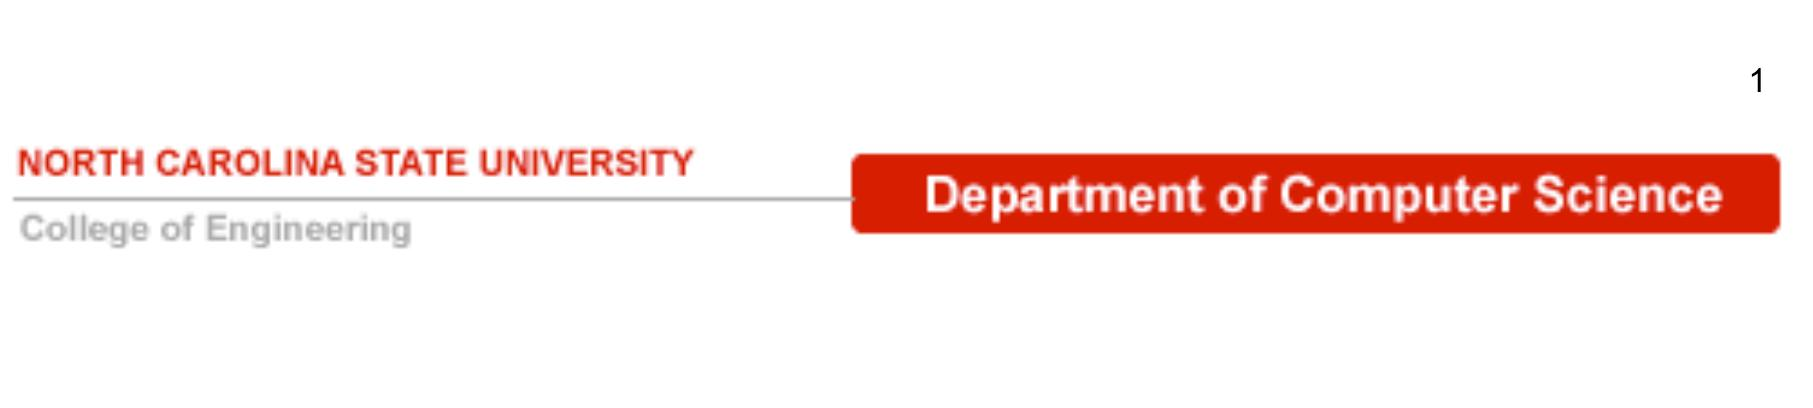

In [ ]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])


for text in response_with_source['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response_with_source['context']['images']:
    print("IMAGE SJDNGSDNG",image)
    display_base64_image(image)